In [102]:
import pandas as pd
from transformers import CamembertTokenizer
import re
import string
import seaborn as sns
sns.set_theme()

In [65]:
df = pd.read_csv('datasets/dataset.csv', sep='|', index_col=0).dropna()
df = df[df.label == 1]
corpus = ' '.join(df[df.label == 1].text.to_list())

In [66]:
tokenizer = CamembertTokenizer.from_pretrained('camembert-base')

def cleaning(text):
    text = re.sub("~@~Y", "'", text)
    text = re.sub( "(@\w*\\b\s?|#\w*\\b\s?|&\w*\\b\s?|\n\s?|\\\\|\<|\>|\||\*)", "", text)
    text = re.sub("\/", "", text)
    text = re.sub("l'", "le ", text)
    text = re.sub("d'", "de ", text)
    text = re.sub("j'", "je ", text)
    text = re.sub("qu'", "que ", text)
    text = re.sub("t'", "te ", text)
    text = re.sub("c'", "ce ", text)
    text = text.lower()
    text = text.strip()
    text = re.compile('<.*?>').sub('', text)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub( ' ', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub(r'\[[0-9]*\]', ' ', text)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return (text)

def preprocessing(text):
    text = cleaning(text)
    text = tokenizer.tokenize(text)
    return text

- average words and characters per article
- most meaningful and frequent words
- plots

In [67]:
prepro_corpus = preprocessing(corpus)

In [70]:
from collections import Counter
counter_words = Counter(prepro_corpus)

In [86]:
frequency_words = pd.DataFrame.from_dict(dict(counter_words), orient='index', columns=['nb_occurences'])

In [87]:
frequency_words = frequency_words.sort_values('nb_occurences', ascending=False).reset_index().rename(columns={'index' : 'word'})

In [88]:
frequency_words

,word,nb_occurences
0,▁de,77644
1,▁que,44048
2,▁le,41274
3,▁la,29599
4,▁à,27645
...,...,...
16891,▁psychiatrie,1
16892,▁transforment,1
16893,dium,1
16894,▁préventif,1


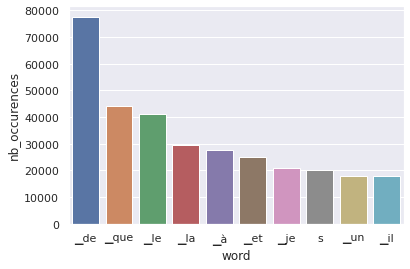

In [104]:
# Les mots les plus fréquents sont des stopwords, enlevons les pour avoir des résultats plus intéressants
ax = sns.barplot(x=frequency_words.word.head(10), y=frequency_words.nb_occurences.head(10))

In [115]:
from nltk.corpus import stopwords
stops = stopwords.words('french')
corpus_no_stop = ' '.join([word for word in cleaning(corpus).split(' ') if word not in stops])
corpus_no_stop = tokenizer.tokenize(corpus_no_stop)

In [116]:
corpus_no_stop

['▁dès',
 '▁matin',
 '▁tête',
 '▁encore',
 '▁tournée',
 '▁contre',
 '▁mur',
 '▁avant',
 '▁avoir',
 '▁vu',
 '▁dessus',
 '▁grands',
 '▁rideaux',
 '▁fenêtre',
 '▁quelle',
 '▁nuance',
 '▁',
 'raie',
 '▁jour',
 '▁savais',
 '▁déjà',
 '▁temps',
 '▁faisait',
 '▁premiers',
 '▁bruits',
 '▁rue',
 '▁appris',
 '▁selon',
 '▁par',
 'ven',
 'aient',
 '▁amorti',
 's',
 '▁dévi',
 'és',
 '▁',
 'humidité',
 '▁vibrant',
 's',
 '▁comme',
 '▁flèche',
 's',
 '▁aire',
 '▁résonna',
 'nte',
 '▁vide',
 '▁matin',
 '▁spacieux',
 '▁glacial',
 '▁pur',
 '▁dès',
 '▁roulement',
 '▁premier',
 '▁tramway',
 '▁entendu',
 '▁mor',
 'fond',
 'u',
 '▁pluie',
 '▁par',
 'tance',
 '▁',
 'azur',
 '▁peut',
 '▁être',
 '▁bruits',
 '▁de',
 'v',
 'ancé',
 's',
 '▁mêmes',
 '▁quelque',
 '▁',
 'éman',
 'ation',
 '▁plus',
 '▁rapide',
 '▁plus',
 '▁pénétrant',
 'e',
 '▁glissé',
 'e',
 '▁travers',
 '▁sommeil',
 '▁répand',
 'ait',
 '▁tristesse',
 '▁',
 'annon',
 'ci',
 'atrice',
 '▁neige',
 '▁faisait',
 '▁en',
 'ton',
 'ner',
 '▁certain',
 '▁pe

In [117]:
freq_not_stop = pd.DataFrame.from_dict(dict(Counter(corpus_no_stop)), orient='index', columns=['nb_occurences'])
freq_not_stop = freq_not_stop.sort_values('nb_occurences', ascending=False).reset_index().rename(columns={'index' : 'word'})

In [118]:
freq_not_stop

,word,nb_occurences
0,s,19712
1,▁,14028
2,e,10865
3,▁plus,8859
4,▁comme,7662
...,...,...
16822,▁sioniste,1
16823,▁chaussures,1
16824,adapte,1
16825,▁troupeaux,1


Il reste quelques mots parasites, enlevons les en supprimant les mots de moins de deux lettres

In [120]:
freq_not_stop = freq_not_stop[freq_not_stop.word.apply(len) > 2]

In [121]:
freq_not_stop

,word,nb_occurences
3,▁plus,8859
4,▁comme,7662
5,▁si,6786
7,ait,5552
8,▁être,5031
...,...,...
16822,▁sioniste,1
16823,▁chaussures,1
16824,adapte,1
16825,▁troupeaux,1


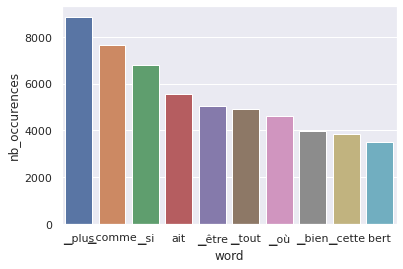

In [122]:
# Il reste principalement des adverbes et verbes qui sont fréquents mais non considérés comme des stop words, malheureusement ils ne sont pas non plus très significatifs
# Par contre ont commence à observer le style de Proust avec "ait" qui est un des mots les plus courants du corpus
ax = sns.barplot(x=freq_not_stop.word.head(10), y=freq_not_stop.nb_occurences.head(10))